## Overview

The task in this assignment is to perform a statistical analysis of the given dataset, using Jupyter Notebook.

The data to be analyzed concerns snails called abalones. The dataset comprises 9 variables (attributes, features) of these snails and contains 4177 observations. One of the variables is qualitative (sex), whereas the others are quantitative.

The analysis should be performed using Jupyter Notebook and documented as a Jupyter notebook.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

1. Using the Pandas package, create a table of the distribution of the qualitative variable in the dataset, which should have the following structure:
- rows should represent individual categories;
- columns:
    - category name,
    - count,
    - percentage (rounded to two decimal places).ces).

In [2]:
#define columns names 
dtype = [
    ('sex'),
    ('length'),
    ('diameter'),
    ('height'),
    ('whole_weight'),
    ('shucked_weight'),
    ('viscera_weight'),
    ('shell_weight'),
    ('rings')
]
#reads csv file using pandas
data = pd.read_csv("data.csv", sep=',', names=dtype)

# quantity counting of 'M','F','I' in 'sex'
count_m = (data['sex'] == 'M').sum()
count_i = (data['sex'] == 'I').sum()
count_f = (data['sex'] == 'F').sum()
# total count
total_count = count_m + count_f + count_i
#calculation of percentages
percent_m = (count_m / total_count) * 100
percent_i = (count_i / total_count) * 100
percent_f = (count_f / total_count) * 100
# table modeling, round-round the percentage vaules to two decimal places
b = {'count': [count_m, count_i, count_f], 
     '%': [round(percent_m, 2), round(percent_i, 2), round(percent_f, 2)]}
df_b = pd.DataFrame(b)
#index of table 
df_b.index = ['Male', 'Infant', 'Female']
df_b


,count,%
Male,1528,36.58
Infant,1342,32.13
Female,1307,31.29


2. Using the Pandas package, create a table with summary statistics for the quantitative variables in the dataset, which should have the following structure:
- rows should represent individual variables;
- columns:
    - variable name,
    - arithmetic mean,
    - standard deviation,
    - minimum value,
    - 1st quartile,
    - 2nd quartile (median),
    - 3rd quartile,
    - maximum value.mum value.

In [3]:
#create an empyt list to store statistics 
summary_stats = []

#list the quantitative variables (without 'sex')
quantitative_variables = [
    'length',
    'diameter',
    'height',
    'whole_weight',
    'shucked_weight',
    'viscera_weight',
    'shell_weight',
    'rings'
]

# iterate through quantitative variables and calculate statistics
# use pandas functions: mean,std,min,quantile,max
for variable in quantitative_variables:
    stats = [
        round(data[variable].mean(), 4),
        round(data[variable].std(), 4),
        round(data[variable].min(), 4),
        round(data[variable].quantile(0.25), 4),
        round(data[variable].quantile(0.5), 4),
        round(data[variable].quantile(0.75), 4),
        round(data[variable].max(), 4)
    ]
#add statistics to list
    summary_stats.append(stats)
#create DataFrame from tge summary_stats list
#join stats to colums
df_summary = pd.DataFrame(summary_stats, columns=[
    'mean', 'std', 'min', '25%', '50%', '75%', 'max'])
#index of table
df_summary.index = ['Length', 'Diameter', 'Height', 'Whole weight', 
                    'Shucked weight', 'Viscera weight', 'Shell weight', 
                    'Rings']
df_summary

,mean,std,min,25%,50%,75%,max
Length,0.5240,0.1201,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,0.4079,0.0992,0.0550,0.3500,0.4250,0.480,0.6500
Height,0.1395,0.0418,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,0.8287,0.4904,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,0.3594,0.2220,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,0.1806,0.1096,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,0.2388,0.1392,0.0015,0.1300,0.2340,0.329,1.0050
Rings,9.9337,3.2242,1.0000,8.0000,9.0000,11.000,29.0000


3. Using a package chosen among Matplotlib, Pandas, or Seaborn, create a bar chart of the counts of occurrences of each category for the qualitative variable in the dataset.

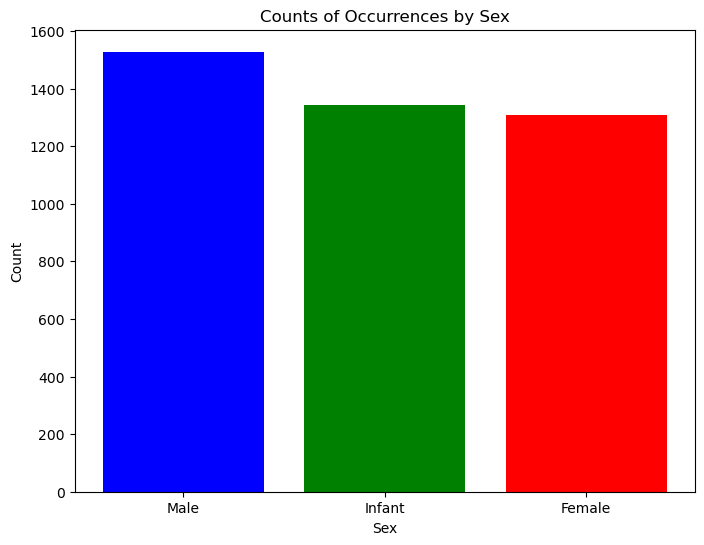

In [4]:
#we use DataFrame from task1 
#we take column count and assign values to the variable
counts = df_b['count']
#we use indexes form the df_b dataFrame
categories = df_b.index
#create a new figure for the plot (8 inches by 6 inches)
plt.figure(figsize=(8, 6))
#create bar chart using matplotlib's function 
plt.bar(categories, counts, color=['blue', 'green', 'red'])
#set labels and title 
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Counts of Occurrences by Sex')
plt.show();

4. Using a package chosen among Matplotlib, Pandas, or Seaborn, create a histogram of each quantitative variable in the dataset. All histograms should be placed in a single figure spanning 4 rows and 2 columns.

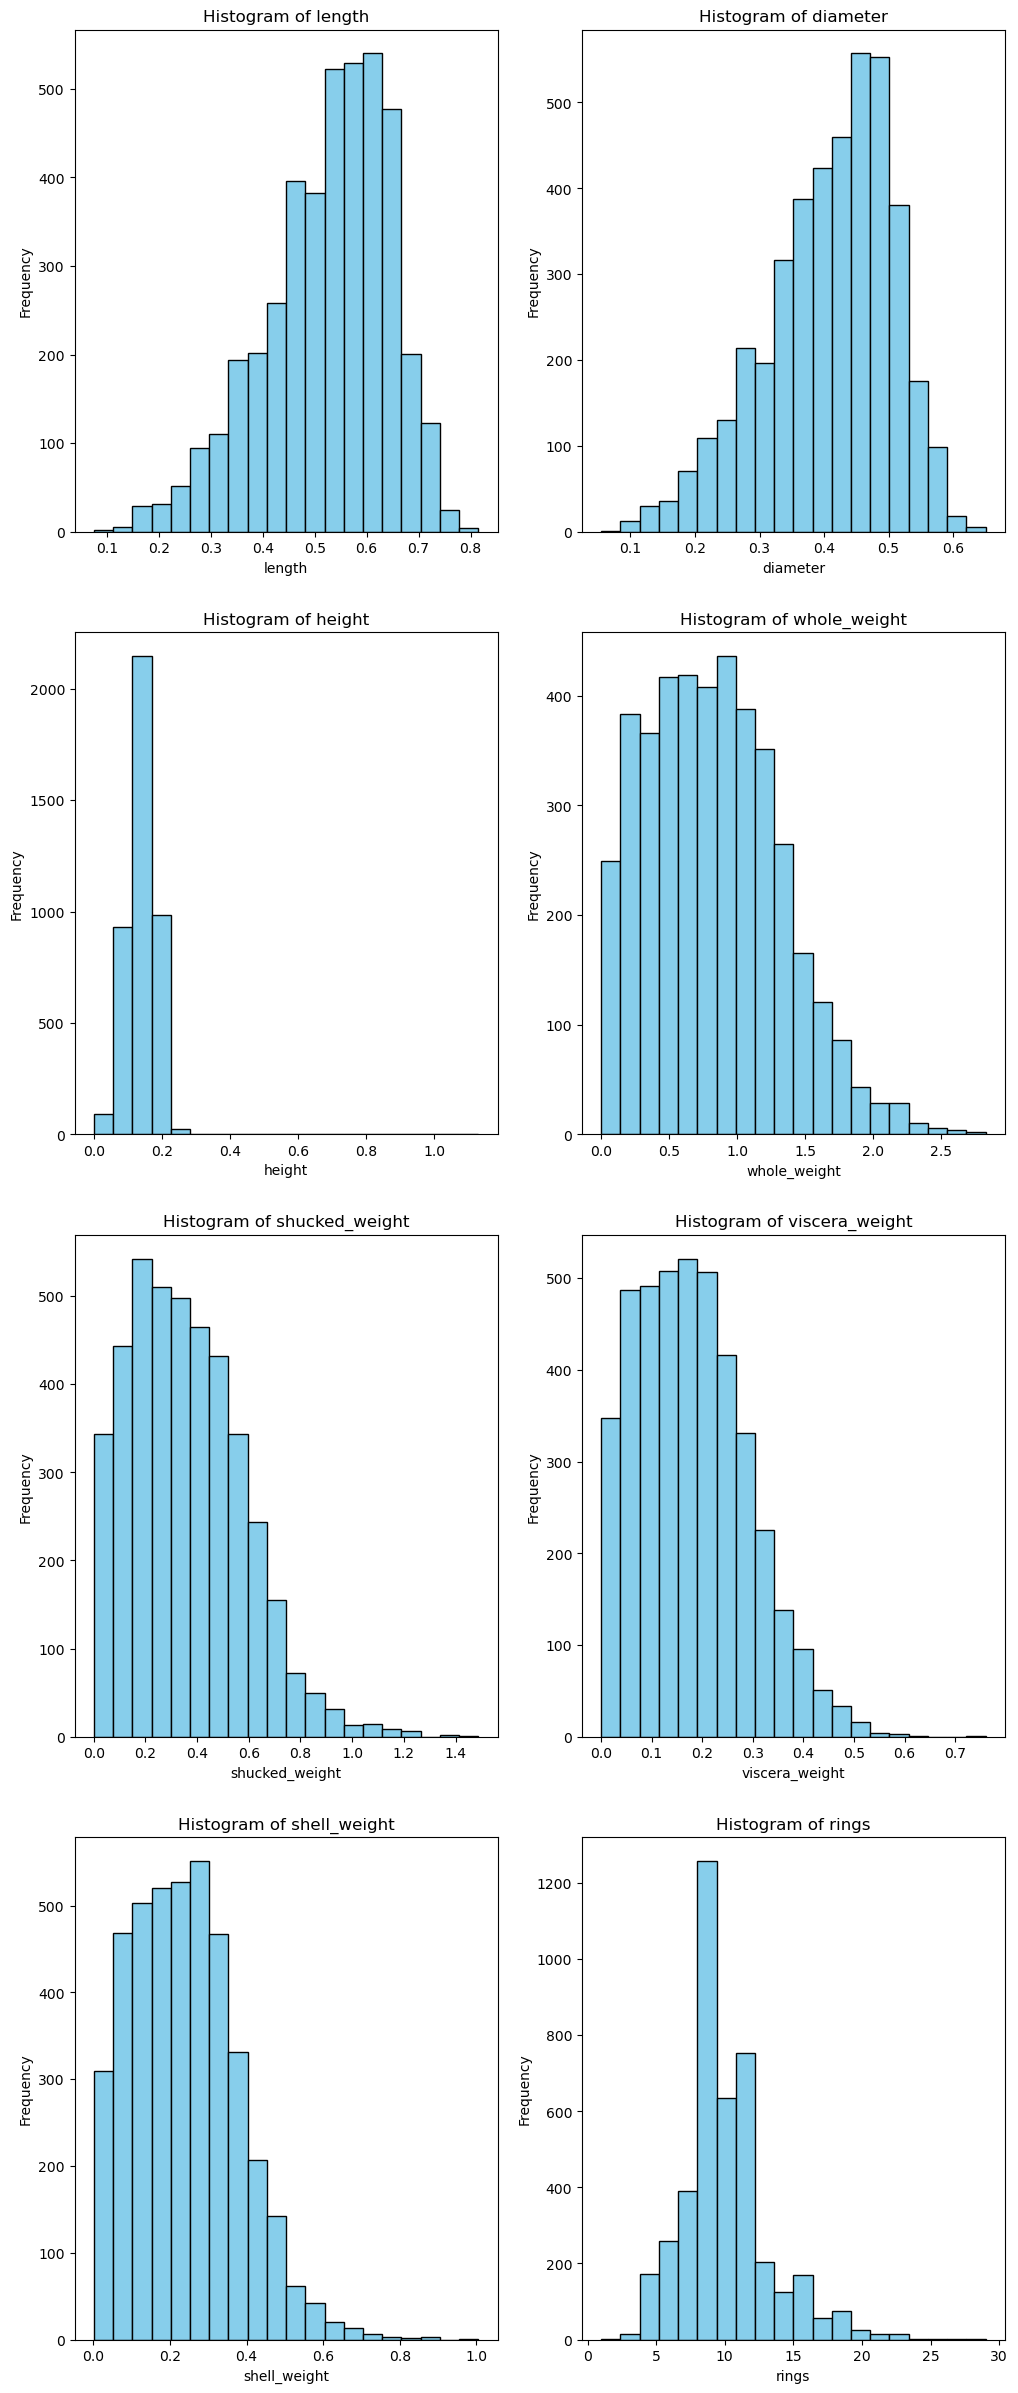

In [5]:
# creating subplots (4 rows, 2 columns)(12 inches by 30 inches)
fig, axes = plt.subplots(4, 2, figsize=(12, 30))
# iterate through each quantitative variables and create histograms
for i, variable in enumerate(quantitative_variables):
# //2 and %2, because we need create 4x2 diagrams
    row = i // 2
    col = i % 2
    axes[row, col].hist(data[variable], bins=20, color='skyblue',
                        edgecolor='black')
    axes[row, col].set_title(f'Histogram of {variable}')
    axes[row, col].set_xlabel(variable)
    axes[row, col].set_ylabel('Frequency')
plt.show()

5. Using a package chosen among Matplotlib, Pandas, or Seaborn, create a scatter plot for each pair of the quantitative variables in the dataset. All scatter plots should be placed in a single figure spanning 14 rows and 2 columns.

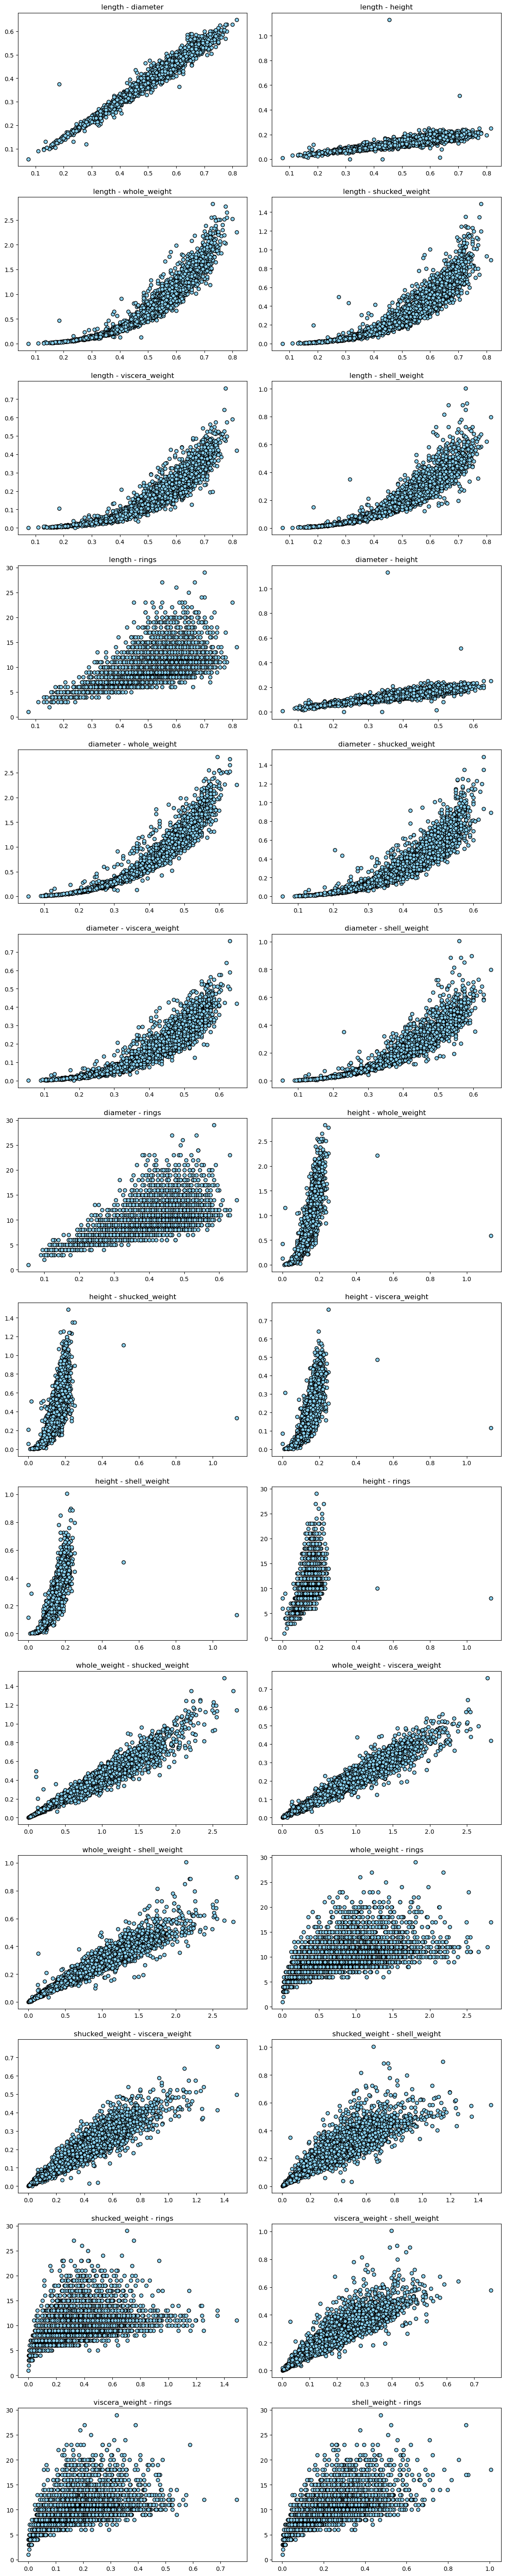

In [13]:
# create a figure (14 rows, 2 colums)
fig, axes = plt.subplots(14, 2, figsize=(12, 60))
fig.tight_layout()
# add vertical spacing between subplots
plt.subplots_adjust(hspace=0.2)
#index for subplot placement
index = 1
#two loops - iterate over pairs of variables and create scatter plots
for x in range(len(quantitative_variables)):
    for y in range(x + 1, len(quantitative_variables)):
        plt.subplot(14, 2, index)
        # create scatter plot using data from the specified quantitative variables
        plt.scatter(data[quantitative_variables[x]], data[quantitative_variables[y]], c='skyblue', edgecolor='black')
        plt.title(quantitative_variables[x] + " - " + quantitative_variables[y])
        index += 1
plt.show()

6. Using the Pandas package, create a table representing a linear correlation matrix of all quantitative variables in the dataset.

In [7]:
# create a linear correlation matrix, corr() -> pandas function 
correlation_matrix = data[quantitative_variables].corr()
correlation_matrix

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


7. Using the Seaborn package, create a heatmap representing a linear correlation matrix of all quantitative variables in the dataset.

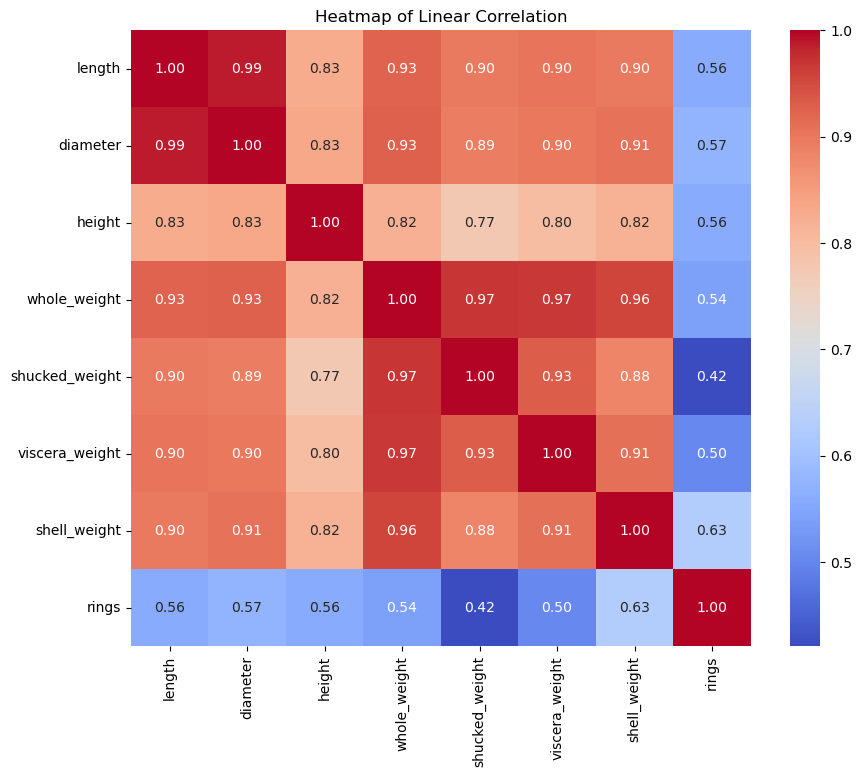

In [8]:
plt.figure(figsize=(10, 8))
# annot -> add values to fields, fmt -> round to two decimal places
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Linear Correlation')
plt.show()

8. Using the Seaborn package, create a linear regression plot with the two quantitative variables that are most strongly linearly correlated (the variables may be hardcoded).

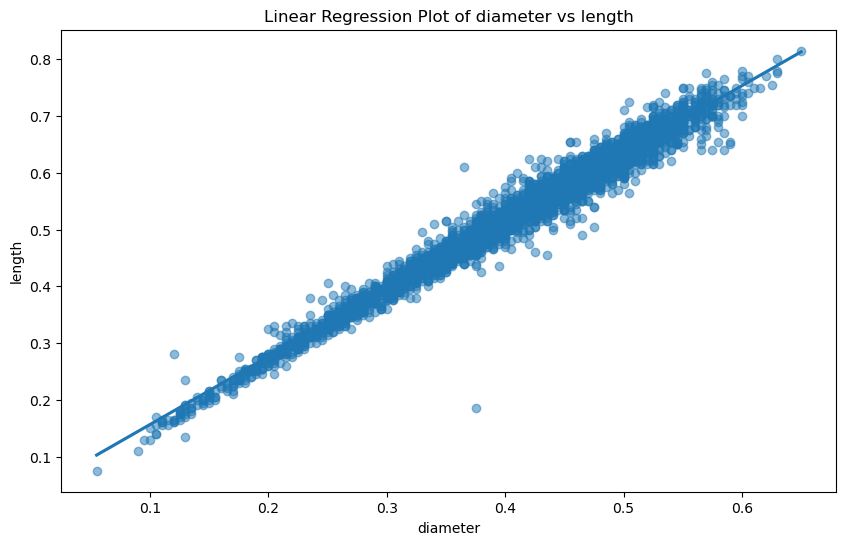

In [9]:
# sort correlation values descending, unstack()->converts to a one-dimensional data
strongest_correlation = correlation_matrix.unstack().sort_values(ascending=False)
# select the highets correlation without 1 (compare the same variables)
strongest_correlation = strongest_correlation[strongest_correlation != 1].idxmax()
# set variables with the highets correlation
x_variable = strongest_correlation[0]
y_variable = strongest_correlation[1]
plt.figure(figsize=(10, 6))                 # alpha -> transparency effect
sns.regplot(data=data, x=x_variable, y=y_variable, scatter_kws={'alpha':0.5})
plt.title(f'Linear Regression Plot of {x_variable} vs {y_variable}')
plt.show()

## Requirements for the maximum grade of 5
- 2. Using the Pandas package, create a table with summary statistics for the quantitative variables in the dataset split by the categories of the qualitative variable, which should have the following structure:
    - rows should represent combinations of individual quantitative variables and individual categories of the qualitative variable;
    - columns:
        - quantitative variable name,
        - qualitative variable category name,
        - arithmetic mean,
        - standard deviation,
        - minimum value,
        - 1st quartile,
        - 2nd quartile (median),
        - 3rd quartile,
        - maximum value.

In [10]:
#create list for statistics 
summary_stats = []
# grouping data by qualitative variable ('sex')
grouped = data.groupby('sex')
# category mapping (for table formatting)
category_mapping = {'F': 'Female', 'I': 'Infant', 'M': 'Male'}
# two loops -> iteration on quantitative variables and 
# another iteration on gender 
for variable in quantitative_variables:
    for category, group in grouped:
        # mapping 'sex' category 
        category_name = category_mapping.get(category, category)
        # calculate statistic using pandas functions 
        mean = group[variable].mean()
        std = group[variable].std()
        min_val = group[variable].min()
        q1 = group[variable].quantile(0.25)
        median = group[variable].median()
        q3 = group[variable].quantile(0.75)
        max_val = group[variable].max()

        # add results to list 
        summary_stats.append([ category_name, mean, std, min_val,
                              q1, median, q3, max_val])
# create DateFrame with summary stats 
summary_df = pd.DataFrame(summary_stats, columns=[ 'Sex',
                                                   'mean', 'std', 'min', '25%',
                                                   '50%', '75%', 'max'])
summary_df.index = ['','Length','','', 'Diameter', '', '', 'Height','', '', 
                    'Whole weight','','','Shucked weight','',
                    '','Viscera weight','','','Shell weight','','','Rings','']
summary_df.columns.name = 'Feature'
summary_df

Feature,Sex,mean,std,min,25%,50%,75%,max
,Female,0.579093,0.086160,0.2750,0.525000,0.59000,0.640000,0.8150
Length,Infant,0.427746,0.108858,0.0750,0.360000,0.43500,0.510000,0.7250
,Male,0.561391,0.102697,0.1550,0.505000,0.58000,0.630000,0.7800
,Female,0.454732,0.070954,0.1950,0.410000,0.46500,0.505000,0.6500
Diameter,Infant,0.326494,0.088109,0.0550,0.270000,0.33500,0.390000,0.5500
,Male,0.439287,0.084398,0.1100,0.395000,0.45500,0.500000,0.6300
,Female,0.158011,0.039984,0.0150,0.140000,0.16000,0.175000,1.1300
Height,Infant,0.107996,0.031995,0.0000,0.085000,0.11000,0.130000,0.2200
,Male,0.151381,0.034804,0.0250,0.130000,0.15500,0.175000,0.5150
,Female,1.046532,0.430316,0.0800,0.730000,1.03850,1.320250,2.6570


- 3. Using a package chosen among Matplotlib, Pandas, or Seaborn, create a boxplot of each quantitative variable in the dataset, grouping every one of them by the qualitative variable. All boxplots should be placed in a single figure spanning 4 rows and 2 columns.

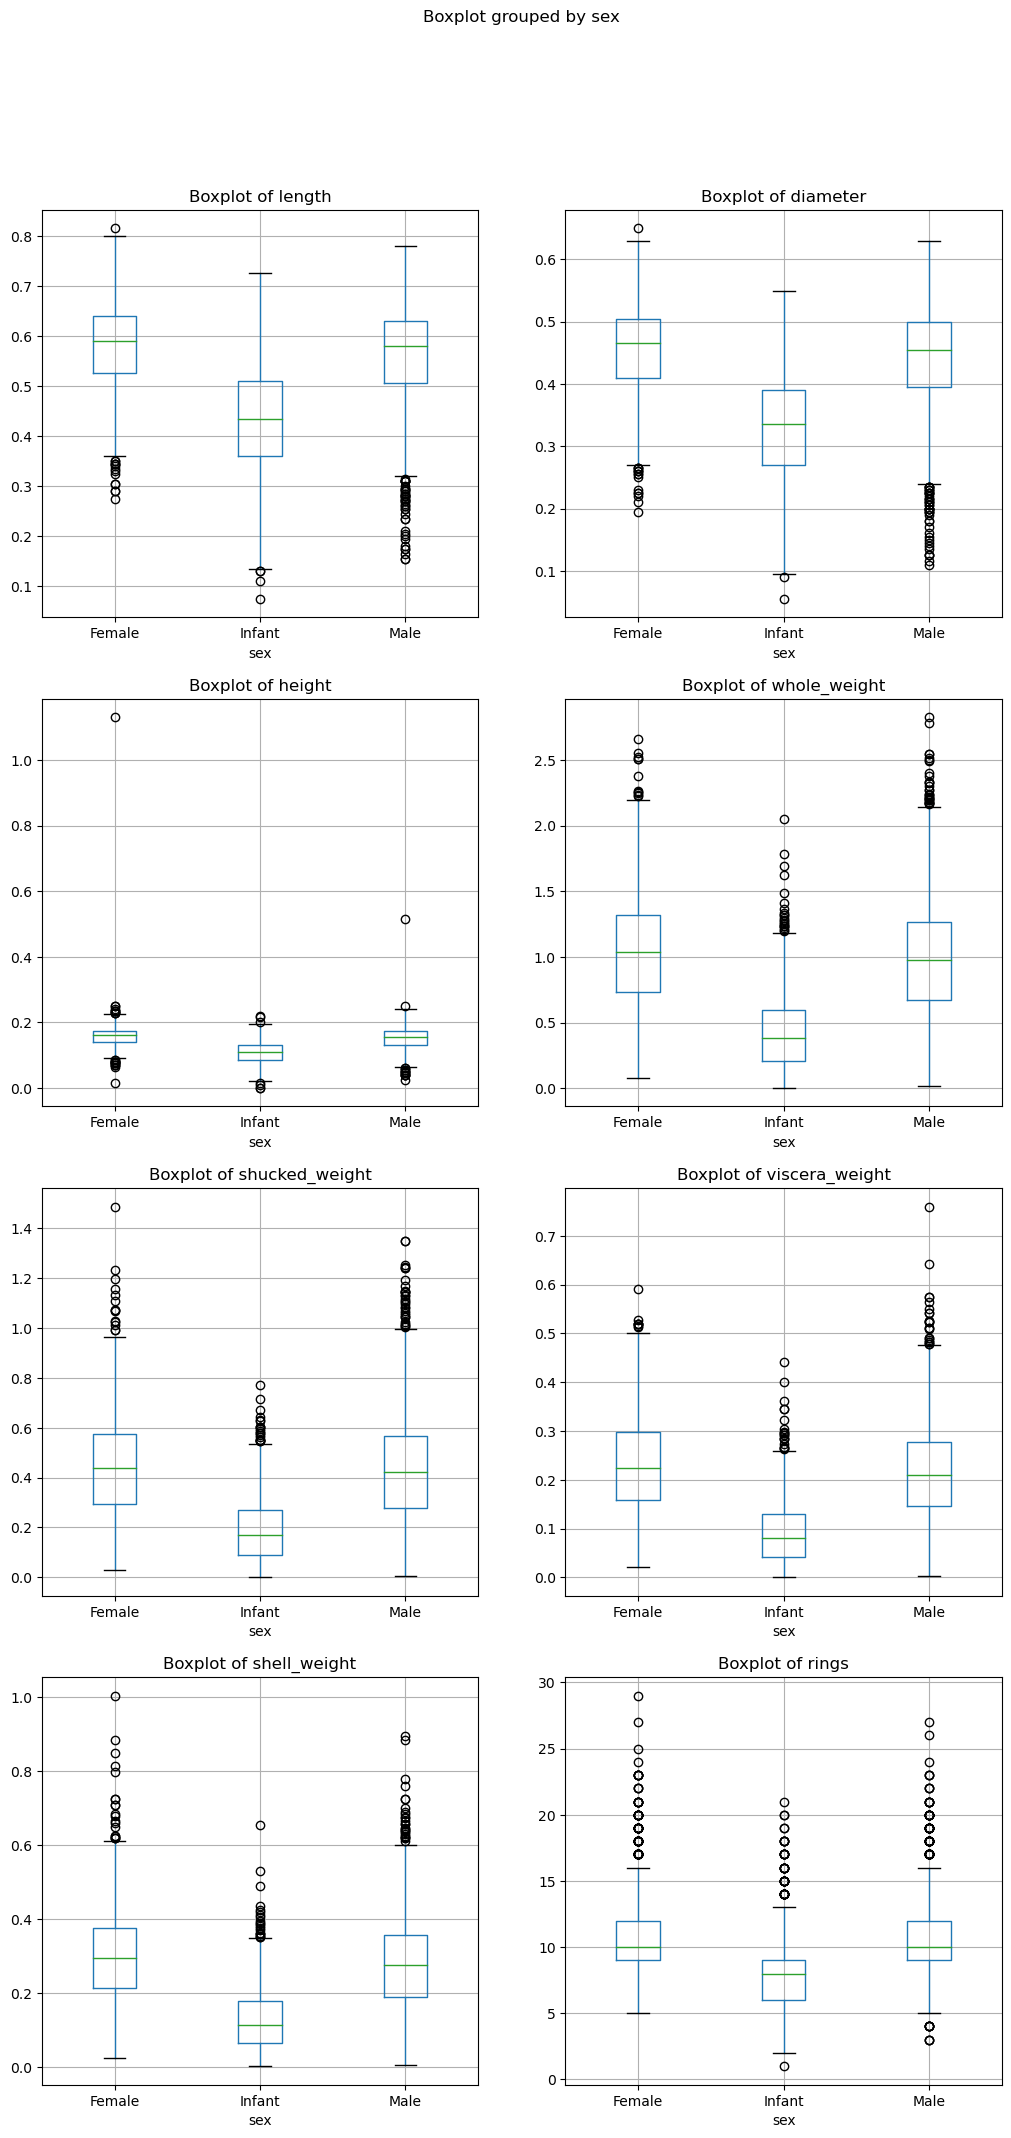

In [11]:
# mapping values to gender name
data['sex'] = data['sex'].map(category_mapping)
fig, axes = plt.subplots(4, 2, figsize=(12, 25))
fig.subplots_adjust(hspace=0.2) 
# iterate through variables and create boxplots
for i, variable in enumerate(quantitative_variables):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    data.boxplot(column=variable, by='sex', ax=ax)
    ax.set_title(f'Boxplot of {variable}')
plt.show()